## School SHSHAT Performance Determinants

### Research Question

What are the key factors affecting schools’ performance in SHSAT assessments?

### Introduction

The Specialized High School Admissions Test (SHSAT) is a required test for all elementary students applying to specialized high schools in New York City. New York City has nine specialized high schools, which provide more rigorous curriculums and educational resources than other public high schools in the city. According to the Department of Education, these schools are intended to support the needs of students who excel academically and artistically. Students from specialized schools in New York City are consistently admitted to the most elite universities and rank amongst the highest-performing high school students in the United States. Specialized high schools provide their students with better resources and opportunities to gain entry to the top universities, and subsequently, the top jobs, they play a critical role in shaping upward socioeconomic mobility. 

As an education received at the nine specialized high schools are therefore the most competitive and sought-after. The SHSAT is the only criterion for admissions to the eight of nine New York City Specialized High Schools Performance on SHSAT overwhelmingly determines which students are admitted to the most elite public high schools in the state. Using a 2016 panel data set that includes observations of the 1271 elementary schools registered in Department of Education in New York City, we will look at the relationship between the average proficiency on the SHSAT of schools and the location of the schools in the City, as well as the relationship between the average proficiency on the SHSAT of schools and the economic need of their students. (The data source = Data Science for Good: PASSNYC)

The outcome variable is the average SHSAT performance of each school in 2016, measured by the average ELA proficiency and average Math proficiency as provided in the dataset. The first explanatory variable I will examine is the location of each school. The variable of the geographic location of each school is particularly interesting as it can serve as an indicator for the quality of teaching and resources available for students, which can positively or negatively impact the students’ performance on the SHSAT. However, the ability to academically perform well is not simply a direct outcome of how good the quality of teaching is at school; we need to take into account that a student’s effort and performance may also hinge on other hidden factors, such as parental support and supplementary resources such as outside-of-school tutoring. The second explanatory variable I will examine is the economic need index of the school’s students, which measures the socioeconomic circumstances of a school's population. This can indicate the students’ access to educational support and resources outside of formal school setting, which can also positively or adversely impact students' SHSAT performances.

#### Importing data of Elementary Schools in New York City in 2016

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing and reading the data
data = pd.read_csv("2016 School Explorer.csv")

In [3]:
data.head()

Adjusted Grade New? Other Location Code in LCGMS  \
0            NaN  NaN                          NaN   
1            NaN  NaN                          NaN   
2            NaN  NaN                          NaN   
3            NaN  NaN                          NaN   
4            NaN  NaN                          NaN   

                      School Name      SED Code Location Code  District  \
0       P.S. 015 ROBERTO CLEMENTE  310100010015        01M015         1   
1             P.S. 019 ASHER LEVY  310100010019        01M019         1   
2            P.S. 020 ANNA SILVER  310100010020        01M020         1   
3  P.S. 034 FRANKLIN D. ROOSEVELT  310100010034        01M034         1   
4       THE STAR ACADEMY - P.S.63  310100010063        01M063         1   

    Latitude  Longitude                    Address (Full)  ...  \
0  40.721834 -73.978766   333 E 4TH ST NEW YORK, NY 10009  ...   
1  40.729892 -73.984231    185 1ST AVE NEW YORK, NY 10003  ...   
2  40.721274 -73.986315   166 ESSEX ST NEW YORK, NY 10002  ...   
3  40.726147 -73.975043  730 E 12TH ST NEW YORK, NY 10009  ...   
4  40.724404 -73.986360   121 E 3RD ST NEW YORK, NY 10009  ...   

  Grade 8 Math - All Students Tested  Grade 8 Math 4s - All Students  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                 48                               1   
4                                  0                               0   

  Grade 8 Math 4s - American Indian or Alaska Native  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

  Grade 8 Math 4s - Black or African American  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

  Grade 8 Math 4s - Hispanic or Latino  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

  Grade 8 Math 4s - Asian or Pacific Islander  Grade 8 Math 4s - White  \
0                                           0                        0   
1                                           0                        0   
2                                           0                        0   
3                                           0                        0   
4                                           0                        0   

  Grade 8 Math 4s - Multiracial Grade 8 Math 4s - Limited English Proficient  \
0                             0                                            0   
1                             0                                            0   
2                             0                                            0   
3                             0                                            0   
4                             0                                            0   

  Grade 8 Math 4s - Economically Disadvantaged  
0                                            0  
1                                            0  
2                                            0  
3                                            0  
4                                            0  

[5 rows x 161 columns]

In [4]:
#there are 1272 schools in the school dataset, 161 variables
data.shape

(1272, 161)

In [5]:
#identifying the variables
pd.options.display.max_seq_items = None
print(data.columns[:30]) #showing a glimpse of what the variables are; the first 30 variables

Index(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Name',
       'SED Code', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)', 'City', 'Zip', 'Grades', 'Grade Low', 'Grade High',
       'Community School?', 'Economic Need Index', 'School Income Estimate',
       'Percent ELL', 'Percent Asian', 'Percent Black', 'Percent Hispanic',
       'Percent Black / Hispanic', 'Percent White', 'Student Attendance Rate',
       'Percent of Students Chronically Absent', 'Rigorous Instruction %',
       'Rigorous Instruction Rating', 'Collaborative Teachers %',
       'Collaborative Teachers Rating'],
      dtype='object')


#### Checking for missing values for our outcome and explanatory variables

In [6]:
#checking if our outcome variable and explanatory variables have missing values
missing = data.isnull()
missing_total = missing.sum().sort_values(ascending=False)
missing_total[['Economic Need Index', 'Average ELA Proficiency', 'Average Math Proficiency', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)', 'City', 'Zip']] #how many missing values are there for each variable of interest


Economic Need Index         25
Average ELA Proficiency     55
Average Math Proficiency    55
Location Code                0
District                     0
Latitude                     0
Longitude                    0
Address (Full)               0
City                         0
Zip                          0
dtype: int64

Our variables of interest are: Economic Need Index, Average ELA Proficiency, Average Math Proficiency, and variables concerning Location. 

There are several schools with missing values for Average ELA Proficiency, Average ELA Math Proficiency, and Economic Need Index. Because such schools lack the information we need to answer our research question, we will omit the schools with the missing values concerning our variables of interest from our evaluation.

In [7]:
#dropping schools that have missing values with avg ELA prof, avg Math prof, and economic need index
data = data.dropna(subset=['Average ELA Proficiency', 'Average Math Proficiency', 'Economic Need Index'])
missing = data.isnull()
missing_total = missing.sum().sort_values(ascending=False)
missing_total[['Economic Need Index', 'Average ELA Proficiency', 'Average Math Proficiency', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)', 'City', 'Zip']] 

Economic Need Index         0
Average ELA Proficiency     0
Average Math Proficiency    0
Location Code               0
District                    0
Latitude                    0
Longitude                   0
Address (Full)              0
City                        0
Zip                         0
dtype: int64

At this points, there are no more missing values for our variables of interest, and we do not need to further clean our dataset to account for missing values.

#### Data Cleaning

In [8]:
#cleaning percentages to floats 

#creating a helper function

def str_prc_to_float(x):
    "converts percentages in strings to a float decimal"
    return float(x.strip('%')) / 100

#applying function

data["Percent Asian"] = data["Percent Asian"].astype(str).apply(str_prc_to_float)
data["Percent Black"] = data["Percent Black"].astype(str).apply(str_prc_to_float)
data["Percent Hispanic"] = data["Percent Hispanic"].astype(str).apply(str_prc_to_float)
data["Percent White"] = data["Percent White"].astype(str).apply(str_prc_to_float)
data["Percent Black / Hispanic"] = data["Percent Black / Hispanic"].astype(str).apply(str_prc_to_float)
data["Rigorous Instruction %"] = data["Rigorous Instruction %"].astype(str).apply(str_prc_to_float)
data["Collaborative Teachers %"] = data["Collaborative Teachers %"].astype(str).apply(str_prc_to_float)
data["Supportive Environment %"] = data["Supportive Environment %"].astype(str).apply(str_prc_to_float)
data["Effective School Leadership %"] = data["Effective School Leadership %"].astype(str).apply(str_prc_to_float)
data["Strong Family-Community Ties %"] = data["Strong Family-Community Ties %"].astype(str).apply(str_prc_to_float)
data["Trust %"] = data["Trust %"].astype(str).apply(str_prc_to_float)
data["Student Attendance Rate"] = data["Student Attendance Rate"].astype(str).apply(str_prc_to_float)
data["Percent of Students Chronically Absent"] = data["Percent of Students Chronically Absent"].astype(str).apply(str_prc_to_float)


data['School Income Estimate'] = data['School Income Estimate'].apply(str).str.replace(',', '')
data['School Income Estimate'] = data['School Income Estimate'].apply(str).str.replace('$', '')
data['School Income Estimate'] = data['School Income Estimate'].apply(str).str.replace(' ', '')
data['School Income Estimate'] = data['School Income Estimate'].astype(str).apply(str_prc_to_float)

/var/folders/xz/7f46dqgn7631zr_snzyl0zn40000gn/T/ipykernel_83559/4160667054.py:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['School Income Estimate'] = data['School Income Estimate'].apply(str).str.replace('$', '')


In [9]:
#Percentages changed to floats
loc_data = pd.DataFrame(data.groupby(['District','City']).mean())
loc_data.head()


SED Code   Latitude  Longitude           Zip  \
District City                                                                 
1        NEW YORK          3.101001e+11  40.721398 -73.982651  10004.769231   
2        NEW YORK          3.102000e+11  40.743920 -73.984067  10037.520833   
         ROOSEVELT ISLAND  3.102000e+11  40.763969 -73.948468  10044.000000   
3        NEW YORK          3.103002e+11  40.794513 -73.964938  10025.153846   
4        NEW YORK          3.104002e+11  40.794150 -73.941331  10030.593750   

                           Economic Need Index  School Income Estimate  \
District City                                                            
1        NEW YORK                     0.682923              446.401589   
2        NEW YORK                     0.356063              949.857981   
         ROOSEVELT ISLAND             0.293000              933.880600   
3        NEW YORK                     0.573385              613.573881   
4        NEW YORK                     0.788000              317.496919   

                           Percent Asian  Percent Black  Percent Hispanic  \
District City                                                               
1        NEW YORK               0.135385       0.192308          0.511923   
2        NEW YORK               0.260833       0.084583          0.192292   
         ROOSEVELT ISLAND       0.290000       0.160000          0.140000   
3        NEW YORK               0.049487       0.364872          0.320256   
4        NEW YORK               0.044063       0.321562          0.571875   

                           Percent Black / Hispanic  ...  \
District City                                        ...   
1        NEW YORK                          0.702308  ...   
2        NEW YORK                          0.277500  ...   
         ROOSEVELT ISLAND                  0.300000  ...   
3        NEW YORK                          0.684103  ...   
4        NEW YORK                          0.893125  ...   

                           Grade 8 Math - All Students Tested  \
District City                                                   
1        NEW YORK                                   22.730769   
2        NEW YORK                                   30.104167   
         ROOSEVELT ISLAND                           18.000000   
3        NEW YORK                                   26.384615   
4        NEW YORK                                   29.312500   

                           Grade 8 Math 4s - All Students  \
District City                                               
1        NEW YORK                                2.576923   
2        NEW YORK                                7.770833   
         ROOSEVELT ISLAND                        0.000000   
3        NEW YORK                                4.307692   
4        NEW YORK                                1.843750   

                           Grade 8 Math 4s - American Indian or Alaska Native  \
District City                                                                   
1        NEW YORK                                                        0.0    
2        NEW YORK                                                        0.0    
         ROOSEVELT ISLAND                                                0.0    
3        NEW YORK                                                        0.0    
4        NEW YORK                                                        0.0    

                           Grade 8 Math 4s - Black or African American  \
District City                                                            
1        NEW YORK                                             0.076923   
2        NEW YORK                                             0.187500   
         ROOSEVELT ISLAND                                     0.000000   
3        NEW YORK                                             2.794872   
4        NEW YORK                                             0.406250   

                          

Since we have converted our numeric values into floats, we do not have to further clean and convert the types of our data.

### Summary Statistics

#### Average Proficiency and Economic Need Index 

For the purposes for summary statistics, I will combine Average ELA Proficiency and Average Math Proficiency, and organize schools based on their combined average performance in Math and English.

In [10]:
#creating a new column for the average ELA and average Math proficiency combined
data['Average ELA and Math Proficiency'] = data[['Average ELA Proficiency','Average Math Proficiency']].mean(axis=1)
data[['School Name', 'Average ELA Proficiency','Average Math Proficiency', 'Average ELA and Math Proficiency']].head()

School Name  Average ELA Proficiency  \
0       P.S. 015 ROBERTO CLEMENTE                     2.14   
1             P.S. 019 ASHER LEVY                     2.63   
2            P.S. 020 ANNA SILVER                     2.39   
3  P.S. 034 FRANKLIN D. ROOSEVELT                     2.48   
4       THE STAR ACADEMY - P.S.63                     2.38   

   Average Math Proficiency  Average ELA and Math Proficiency  
0                      2.17                             2.155  
1                      2.98                             2.805  
2                      2.54                             2.465  
3                      2.47                             2.475  
4                      2.54                             2.460

In [11]:
data[['Average ELA and Math Proficiency', 'Economic Need Index']].describe()

Average ELA and Math Proficiency  Economic Need Index
count                       1217.000000          1217.000000
mean                           2.601586             0.671048
std                            0.410410             0.211201
min                            1.895000             0.049000
25%                            2.275000             0.550000
50%                            2.515000             0.730000
75%                            2.860000             0.840000
max                            4.040000             0.957000

Here, in the summary statistics of our outcome (y) variables Average ELA Proficiency and Average Math Proficiency, and our first explanatory (x_1) variable Economic Need Index, we can see that average elementary school has the proficiency levels for English and Math of 2.6, and an average economic need index of 0.67.


#### Average Proficiency and Location of School

In [12]:
#renaming the column 'city' to 'neighbourhood' for clarification
names = data.columns.tolist()
names[names.index('City')] = 'Neighbourhood'
data.columns = names

In [13]:
#there are a lot of neighbourhoods in the dataset
loc_data = data.groupby(['Neighbourhood']).count()
print(loc_data.index)

Index(['ARVERNE', 'ASTORIA', 'BAYSIDE', 'BELLEROSE', 'BROAD CHANNEL', 'BRONX',
       'BROOKLYN', 'CAMBRIA HEIGHTS', 'COLLEGE POINT', 'CORONA', 'DOUGLASTON',
       'EAST ELMHURST', 'ELMHURST', 'FAR ROCKAWAY', 'FLORAL PARK', 'FLUSHING',
       'FOREST HILLS', 'GLENDALE', 'HOLLIS', 'HOWARD BEACH', 'JACKSON HEIGHTS',
       'JAMAICA', 'KEW GARDENS', 'LITTLE NECK', 'LONG ISLAND CITY', 'MASPETH',
       'MIDDLE VILLAGE', 'NEW YORK', 'OZONE PARK', 'QUEENS VILLAGE',
       'REGO PARK', 'RICHMOND HILL', 'RIDGEWOOD', 'ROCKAWAY BEACH',
       'ROCKAWAY PARK', 'ROOSEVELT ISLAND', 'ROSEDALE', 'SAINT ALBANS',
       'SOUTH OZONE PARK', 'SOUTH RICHMOND HILL', 'SPRINGFIELD GARDENS',
       'STATEN ISLAND', 'WHITESTONE', 'WOODHAVEN', 'WOODSIDE'],
      dtype='object', name='Neighbourhood')


To better capture the summary statistics of our outcome variable (y) Average ELA Proficiency and Average Math Proficiency and our second explanatory variable (x_2) Location of Schools (which spans across 46 neighbourhoods), we will be using a boxplot rather a summary statistics table to visualize the information. 

<AxesSubplot:>

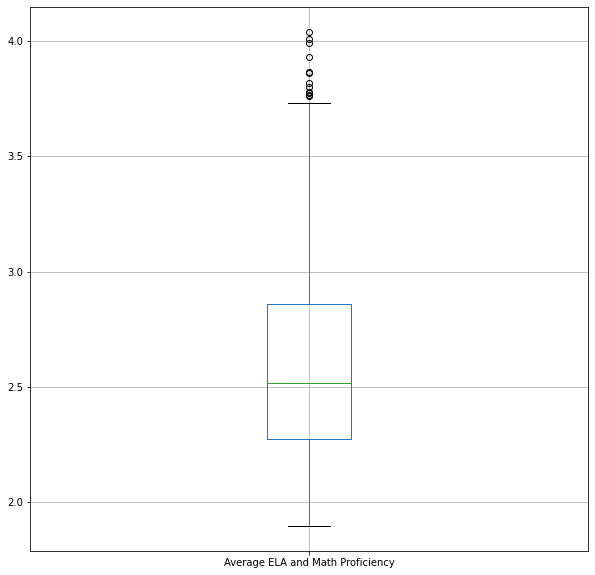

In [14]:
plt.figure(figsize=(10,10))
data.boxplot(column='Average ELA and Math Proficiency')

Here, in the boxplot, we can see how schools perform on their ELA and Math proficiency scores. We observe that the school in the 50th percentile has around has a proficiency score of approximately 2.5. The local maximum for proficiency in a NYC city is at around 3.7, and the local minimum is at just above 1.5.

The boxplot is unable to provide information on the geographic location of the schools. 

In [15]:
#creating a new column 'borough' 
Borough = []

#sorting each neighbourhood into the correct borough it belongs to
for value in data['Neighbourhood']:
    if value == 'BRONX':
        Borough.append('Bronx')
    elif value == 'BROOKLYN':
        Borough.append('Brooklyn')
    elif value == 'STATEN ISLAND':
        Borough.append('Staten Island')
    elif value == 'NEW YORK':
        Borough.append('Manhattan')
    elif value == 'ROOSEVELT ISLAND':
        Borough.append('Manhattan')
    else:
        Borough.append('Queens')
        
data['Borough'] = Borough

In [16]:
#creating new dataframes for each Borough
manhattan_df = data.loc[(data['Borough'] == 'Manhattan')]
queens_df = data.loc[(data['Borough'] == 'Queens')]
staten_island_df = data.loc[(data['Borough'] == 'Staten Island')]
bronx_df = data.loc[(data['Borough'] == 'Bronx')]
brooklyn_df = data.loc[(data['Borough'] == 'Brooklyn')]

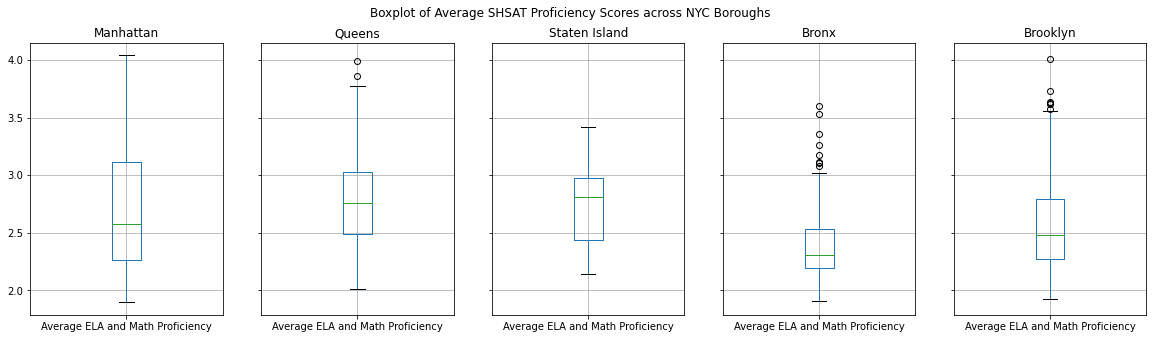

In [17]:
#creating boxplots for each Borough
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,5), sharey=True)
plt.suptitle('Boxplot of Average SHSAT Proficiency Scores across NYC Boroughs') 
manhattan_df.boxplot(column='Average ELA and Math Proficiency', ax=ax1)
ax1.title.set_text('Manhattan')
queens_df.boxplot(column='Average ELA and Math Proficiency', ax=ax2)
ax2.title.set_text('Queens')
staten_island_df.boxplot(column='Average ELA and Math Proficiency', ax=ax3)
ax3.title.set_text('Staten Island')
bronx_df.boxplot(column='Average ELA and Math Proficiency', ax=ax4)
ax4.title.set_text('Bronx')
brooklyn_df.boxplot(column='Average ELA and Math Proficiency', ax=ax5)
ax5.title.set_text('Brooklyn')



## explanation missing ^

### Histogram of Outcome Variable 

Text(0.5, 0, 'Average SHSAT Proficiency Levels')

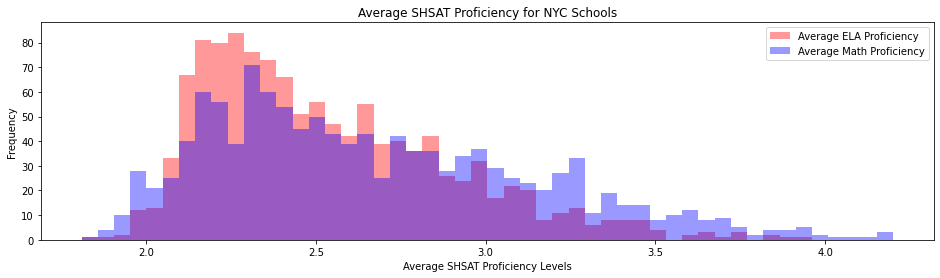

In [18]:
#creating a dataframe with just the proficiency variables
data_p = data[['Average ELA Proficiency', 'Average Math Proficiency']]

#creating a histogram
fig,ax = plt.subplots(figsize=(16,4))
data_p.plot.hist(bins=50,ax=ax, alpha=0.4, #making the colour value lower
           color=['r','b'], 
           title='Average SHSAT Proficiency for NYC Schools')
ax.set_xlabel('Average SHSAT Proficiency Levels')

### Graphs of Explanatory Variables

#### Histogram of Economic Need Index

Text(0.5, 0, 'Economic Need Index')

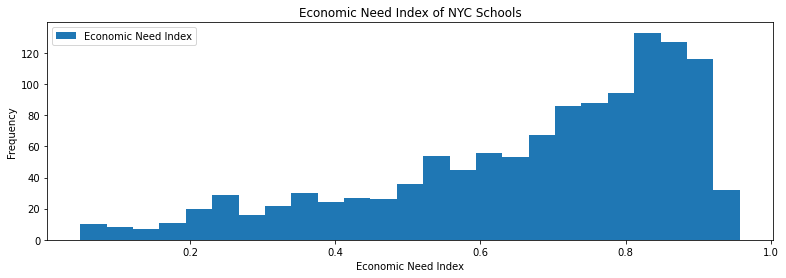

In [19]:
data_e = data[['Economic Need Index']]

fig,ax = plt.subplots(figsize=(13,4))
data_e.plot.hist(bins=25,ax=ax, title='Economic Need Index of NYC Schools')
ax.set_xlabel('Economic Need Index')

As we see above, most elementary schools in New York City have a student population that has a high economic need, as most schools are concentrated in economic need index evels of 0.6 to 0.10. We see a clear trend of a decrease in the number of schools as we move leftward towards a lower economic need index. This pattern of distribution makes sense as it approximately reflects the household income distribution in New York City. The majority of New York City household annual incomes are 60,000 USD or below, and fewer and fewer households earning incomes of 60,000 USD - 100,000 USD bracket, and a small minority of households earing incomes of 100,000 USD and more.

#### Groupby Table and Boxplot of Locations of School 

In [20]:
#creating a table counting the number of schools per city
gb_data = data.groupby(['Neighbourhood'])
schools_per_neighbourhood = gb_data['School Name'].count().sort_values(ascending=False).reset_index().set_index('Neighbourhood')
schools_per_neighbourhood.rename(columns={'School Name':'Number of Schools'}, inplace=True)
schools_per_neighbourhood.head(10)

Number of Schools
Neighbourhood                      
BROOKLYN                        394
BRONX                           280
NEW YORK                        220
STATEN ISLAND                    60
JAMAICA                          31
FLUSHING                         28
LONG ISLAND CITY                 21
FAR ROCKAWAY                     13
BAYSIDE                          12
SOUTH OZONE PARK                 10

There are three clear outliers: Brooklyn has 411 schools, Bronx has 297 schools, and New York has 232 schools. There are four other datapoints that may be considered as outliers: Staten Island, Jamaica, Flushing, and Long Island City. These four cities have over 20 elementary schools, which the rest of the cities in New York City do not.

To get a better visualization of the lower quartile, median, upper quartiles, we will look at the boxplot with cities under 20 schools. 

([<matplotlib.axis.YTick at 0x7fc677b4df70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

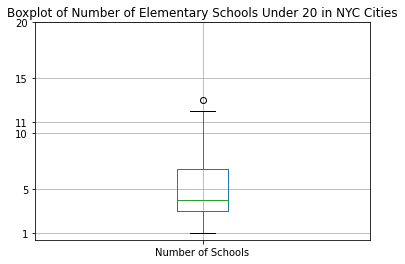

In [21]:
#creating a boxplot
under_20 = schools_per_neighbourhood <= 20
schools_per_neighbourhood[under_20].boxplot()
plt.title('Boxplot of Number of Elementary Schools Under 20 in NYC Cities') 
plt.yticks([1, 5, 10, 11, 15, 20])

The boxplot informs us that excluding cities with over 20 elementary schools, we observe that the school in the 50th percentile has around 5 schools and the local maximum for the number of elementary schools in a NYC city is 11. 

### Scatterplot of y, x_1, and x_2 variables

#### Economic Need Index vs SHSAT Proficiency

Text(0.5, 1.0, 'Scatterplot of New York City Elementary School Economic Need Index vs Average ELA/Math Proficiency')

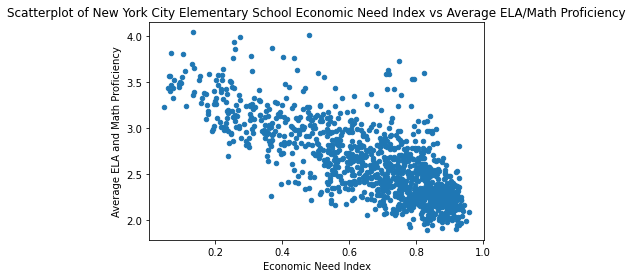

In [22]:
#creating a scatterplot
data.plot.scatter(x='Economic Need Index', y='Average ELA and Math Proficiency')
plt.title('Scatterplot of New York City Elementary School Economic Need Index vs Average ELA/Math Proficiency')
 

Here, we see a negative correlation between average ELA and Math proficiency and Economic Need Index. As the economic need of the school's student populations are higher, the average ELA/Math proficiency decreases. This is an expected and logical outcome; students who are socioeconomically better off tend to do better academically due to the additional resources and  support they are able to acquire, while students who are socioeconomically disadvantaged cannot access or afford such capital, like parental support and supplementary classes.

#### Location of School vs SHSAT Proficiency

Text(0.5, 0, 'Average ELA/Math Proficiency Level')

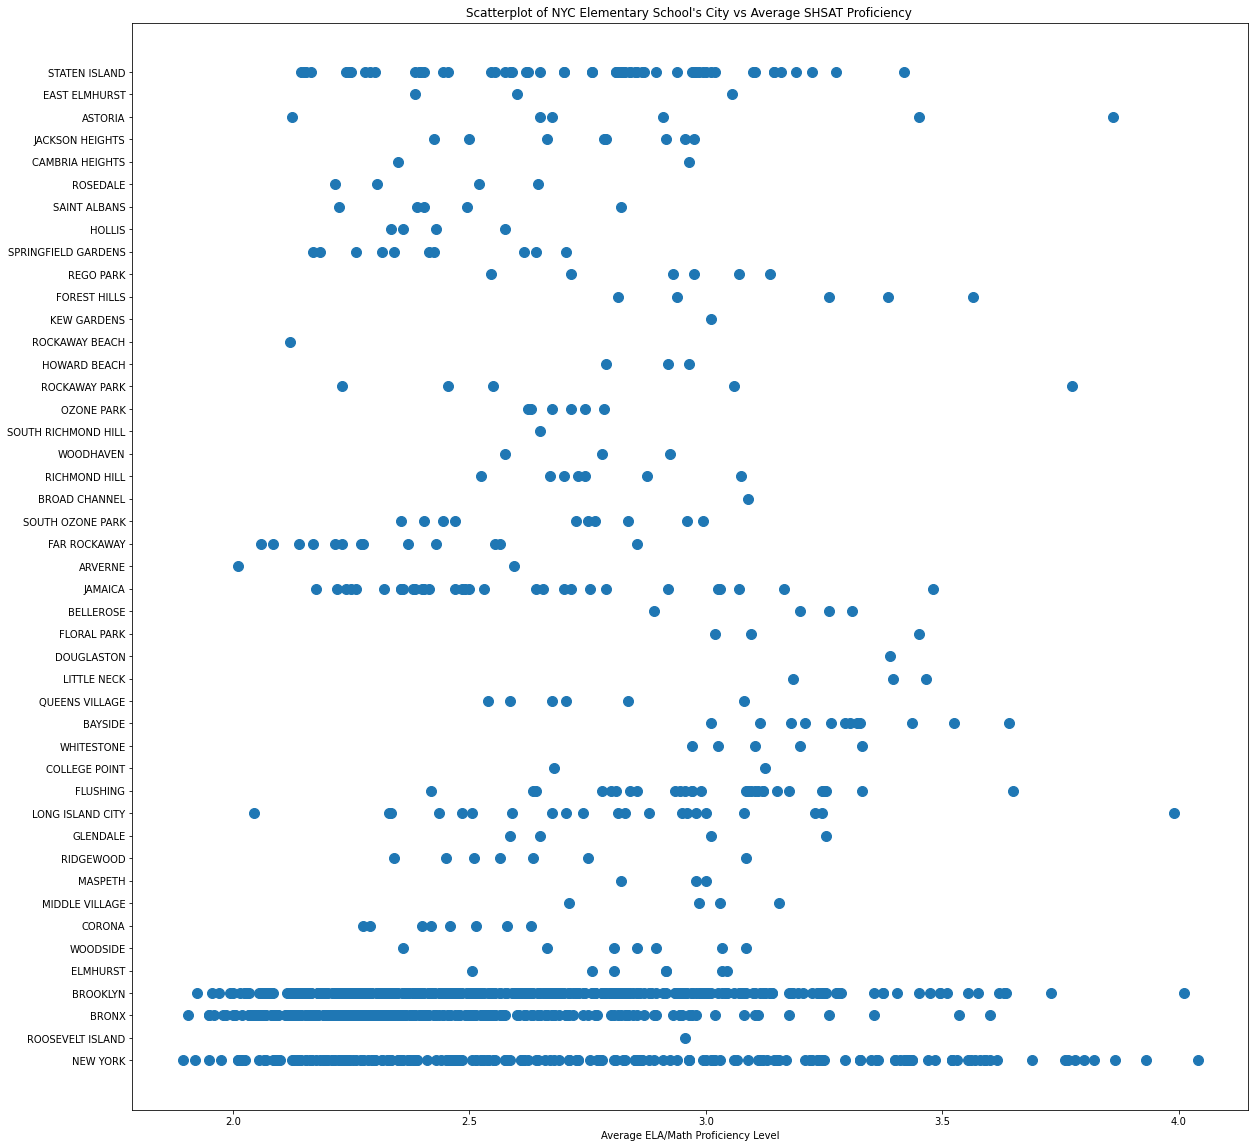

In [23]:
#creating a scatterplot
plt.figure(figsize=(20,20))
plt.scatter(x=data['Average ELA and Math Proficiency'], y=data['Neighbourhood'], s=100)
plt.title("Scatterplot of NYC Elementary School's City vs Average SHSAT Proficiency ")
plt.xlabel('Average ELA/Math Proficiency Level')

Above, we have used a scatterplot to observe the relationship between the neighbourhood in which the school is located and the average ELA/Math proficiency levels of the school. However, there doesn't seem to be clear corrleation that appears between neighbourhood and average SHSAT proficiency levels. However, given that certain neighbourhoods are exponentially larger in size compared to other cities, and schools within large may be geographically separated, we may be able to find a more meaningful relationship between location and average SHSAT proficiency levels whilst incorporating using another form of data visualization. 

### Conclusion for Part 1

In sum, we have examined two factors that may determine a school's average SHSAT proficiency levels. Thus far, we are not able to draw any conclusions to the relationship between the location of the school and the school's average SHSAT proficiency levels. However, there seems negative relationship between the school's SHSAT proficiency and the economic need of the school's student population. 

#### Future Steps

To further examine the factors that determine a school's average performance in the SHSAT, we should examine more closely the location, particularly utlizing the other variables available to denote geographic location other city.

### Part 2

THE MESSAGE: The economic need of a school has a negative effect on their SHSAT proficiency performance levels. The geographic location of a school has an effect on the school's SHSAT performance levels.

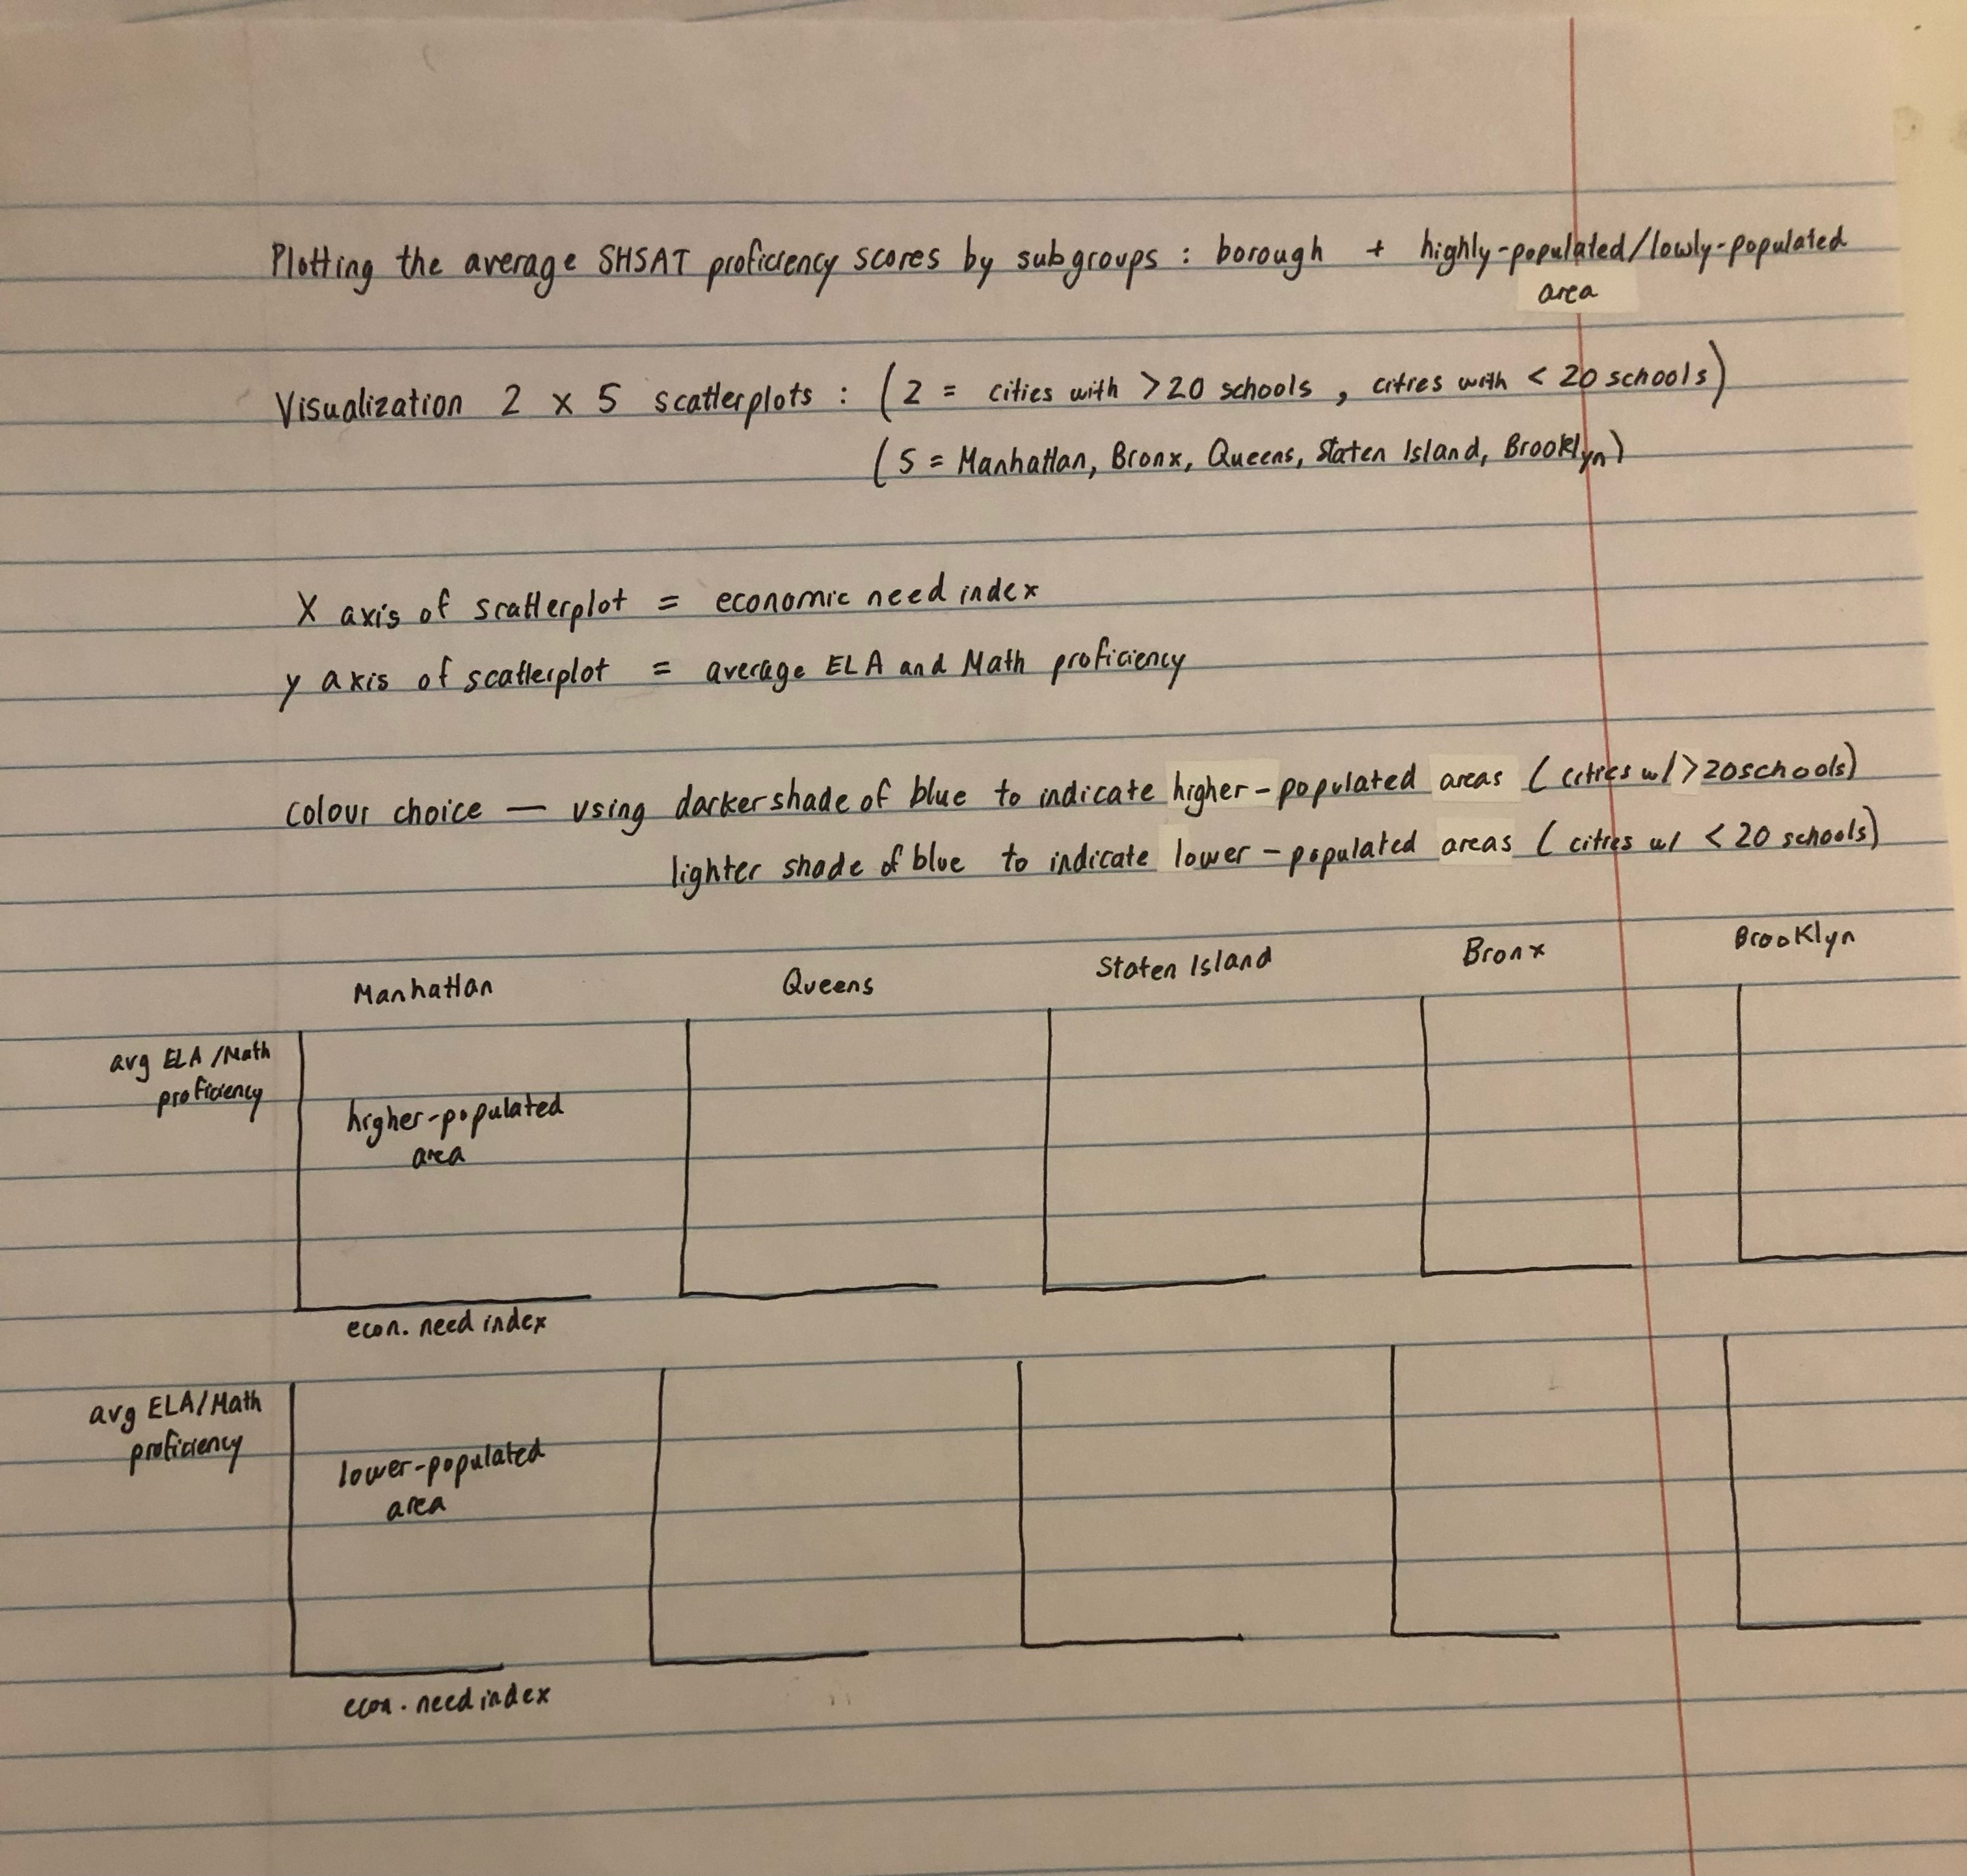

In [24]:
from IPython import display
display.Image("/Users/nicoleshi/Desktop/eco225 files/ECO225 Project/IMG_7907.jpeg")

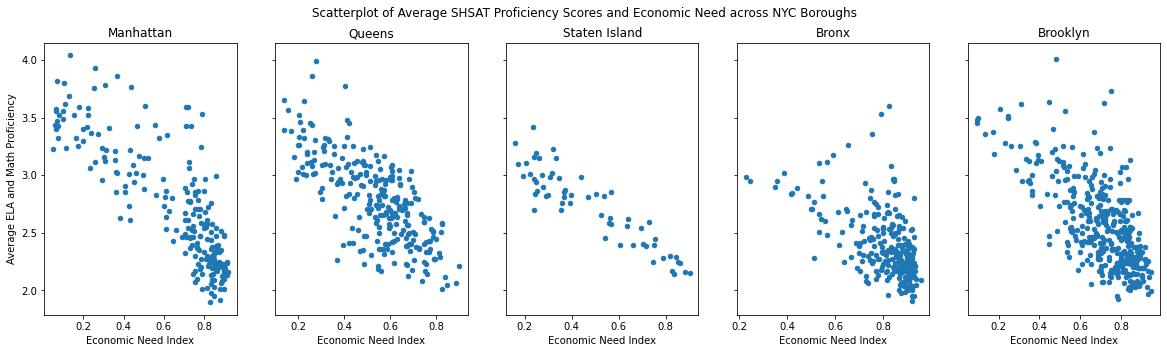

In [25]:
#creating boxplots for each Borough
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,5), sharey=True)
plt.suptitle('Scatterplot of Average SHSAT Proficiency Scores and Economic Need across NYC Boroughs') 
manhattan_df.plot.scatter(x='Economic Need Index', y='Average ELA and Math Proficiency', ax=ax1)
ax1.title.set_text('Manhattan')
queens_df.plot.scatter(x='Economic Need Index', y='Average ELA and Math Proficiency', ax=ax2)
ax2.title.set_text('Queens')
staten_island_df.plot.scatter(x='Economic Need Index', y='Average ELA and Math Proficiency', ax=ax3)
ax3.title.set_text('Staten Island')
bronx_df.plot.scatter(x='Economic Need Index', y='Average ELA and Math Proficiency', ax=ax4)
ax4.title.set_text('Bronx')
brooklyn_df.plot.scatter(x='Economic Need Index', y='Average ELA and Math Proficiency', ax=ax5)
ax5.title.set_text('Brooklyn')


## Part 3

#### outcome variable map (ELA and Math Proficiency)

In [26]:
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [27]:
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
borough_df = gpd.read_file('/Users/nicoleshi/Desktop/eco225 files/ECO225 Project/Borough Boundaries.zip')
borough_df.head()

boro_code      boro_name    shape_area     shape_leng  \
0        1.0      Manhattan  6.366208e+08  359993.127161   
1        2.0          Bronx  1.187194e+09  463868.935588   
2        3.0       Brooklyn  1.934174e+09  728195.194837   
3        5.0  Staten Island  1.623631e+09  325924.002252   
4        4.0         Queens  3.040206e+09  900269.281914   

                                            geometry  
0  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
1  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
2  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
3  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...

In [28]:
zipfile = "zip:///Users/nicoleshi/Desktop/eco225 files/ECO225 Project/Data/School Districts.zip"
school_district = gpd.read_file(zipfile)
school_district["school_dis"] = school_district["school_dis"].apply(int) #data cleaning
school_district.head()

school_dis    shape_area     shape_leng  \
0          32  5.189850e+07   37251.057496   
1          16  4.676362e+07   35848.904343   
2           7  9.225858e+07   65300.498249   
3          28  2.475655e+08  114699.995616   
4          18  1.751929e+08  120924.900794   

                                            geometry  
0  POLYGON ((-73.91181 40.70343, -73.91290 40.702...  
1  POLYGON ((-73.93312 40.69579, -73.93237 40.695...  
2  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
3  POLYGON ((-73.84485 40.73575, -73.84480 40.735...  
4  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...

In [29]:
data["Coordinates"] = list(zip(data.Longitude, data.Latitude))
data['Coordinates'] = data['Coordinates'].apply(Point)
data[['School Name', 'Borough','Neighbourhood', 'Coordinates']].head()

School Name    Borough Neighbourhood  \
0       P.S. 015 ROBERTO CLEMENTE  Manhattan      NEW YORK   
1             P.S. 019 ASHER LEVY  Manhattan      NEW YORK   
2            P.S. 020 ANNA SILVER  Manhattan      NEW YORK   
3  P.S. 034 FRANKLIN D. ROOSEVELT  Manhattan      NEW YORK   
4       THE STAR ACADEMY - P.S.63  Manhattan      NEW YORK   

                            Coordinates  
0  POINT (-73.97876599999999 40.721834)  
1  POINT (-73.98423099999999 40.729892)  
2          POINT (-73.986315 40.721274)  
3          POINT (-73.975043 40.726147)  
4           POINT (-73.98636 40.724404)

In [30]:
gdf = gpd.GeoDataFrame(data, geometry="Coordinates")
gdf
gdf[['School Name', 'Borough','Neighbourhood','Average ELA and Math Proficiency', 'Coordinates']].head()

School Name    Borough Neighbourhood  \
0       P.S. 015 ROBERTO CLEMENTE  Manhattan      NEW YORK   
1             P.S. 019 ASHER LEVY  Manhattan      NEW YORK   
2            P.S. 020 ANNA SILVER  Manhattan      NEW YORK   
3  P.S. 034 FRANKLIN D. ROOSEVELT  Manhattan      NEW YORK   
4       THE STAR ACADEMY - P.S.63  Manhattan      NEW YORK   

   Average ELA and Math Proficiency                 Coordinates  
0                             2.155  POINT (-73.97877 40.72183)  
1                             2.805  POINT (-73.98423 40.72989)  
2                             2.465  POINT (-73.98632 40.72127)  
3                             2.475  POINT (-73.97504 40.72615)  
4                             2.460  POINT (-73.98636 40.72440)

In [31]:
#gdf_schools = gdf.merge(data, left_on="Borough", right_on="Borough", how="inner")
#renaming Average ELA and Math proficiency
names = gdf.columns.tolist()
names[names.index('Average ELA and Math Proficiency')] = 'prof_avg'
gdf.columns = names

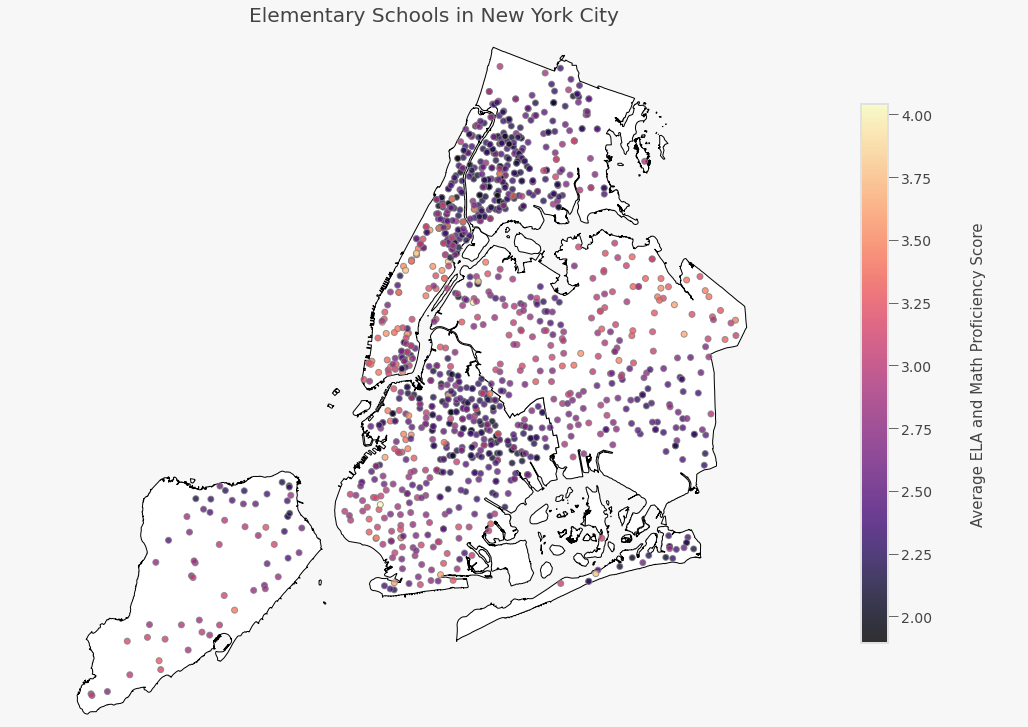

In [32]:
fig, gax = plt.subplots(figsize=(18, 18))
borough_df.plot(ax=gax, edgecolor="black", color="white") #borough borders
plt.scatter(data.Longitude, data.Latitude, c=data.prof_avg,cmap='magma', linewidth=1, edgecolor='grey', alpha=0.8)
plt.ylim([40.492507, 40.928088])
plt.xlim([-74.313573, -73.605205]) #boundary box of NYC State Districts

cbar = plt.colorbar(shrink=0.55, pad=0.0000001)
cbar.set_label('\n\nAverage ELA and Math Proficiency Score\n\n', fontsize=15)

plt.axis('off')
plt.title('Elementary Schools in New York City')
plt.show()



#### explanatory variable map (Economic Need)

In [33]:
names = gdf.columns.tolist()
names[names.index('Economic Need Index')] = 'econ'
gdf.columns = names

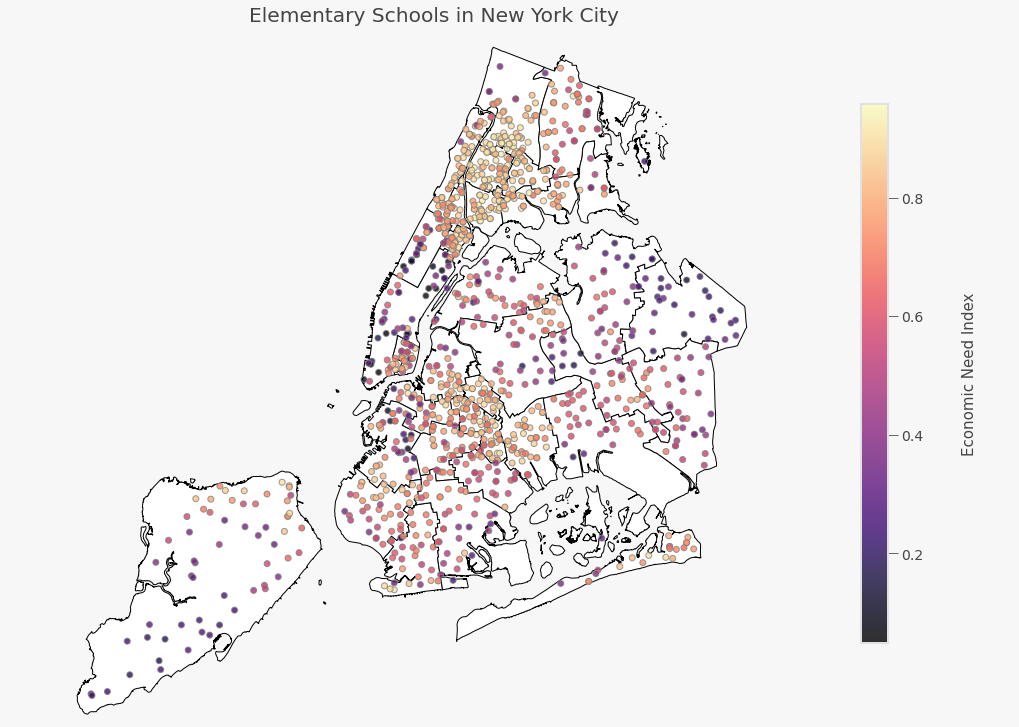

In [34]:
fig, gax = plt.subplots(figsize=(18, 18))
school_district.plot(ax=gax, edgecolor="black", color="white") #school district borders
plt.scatter(data.Longitude, data.Latitude, c=data.econ, cmap='magma', linewidth=1, edgecolor='grey', alpha=0.8)
plt.ylim([40.492507, 40.928088])
plt.xlim([-74.313573, -73.605205]) #boundary box of NYC State Districts

cbar = plt.colorbar(shrink=0.55, pad=0.0000001)
cbar.set_label('\n\nEconomic Need Index\n\n', fontsize=15)

plt.axis('off')
plt.title('Elementary Schools in New York City')
plt.show()

subdivide it into school districts within each borough -- can see pattern

### bonus - income levels per school district

32 school districts
- school district average household income
- percentage race: https://www.kaggle.com/new-york-city/nyc-school-district-breakdowns?select=school-district-breakdowns.csv

In [35]:
district_demo = pd.read_csv('/Users/nicoleshi/Desktop/eco225 files/ECO225 Project/archive (1)/school-district-breakdowns.csv')

In [36]:
#creating a new column 'school_dis' 
district_demo['school_dis'] = district_demo['JURISDICTION NAME'].str.extract('(\d+)').astype(int)
district_demo['PERCENT RECEIVES PUBLIC ASSISTANCE']=district_demo['PERCENT RECEIVES PUBLIC ASSISTANCE'].replace(0,np.nan)

district_demo['PERCENT RECEIVES PUBLIC ASSISTANCE']

0      NaN
1     0.31
2     0.37
3     0.40
4     0.14
5     0.39
6     0.30
7     0.24
8     0.35
9     0.35
10    0.35
11    0.46
12    0.50
13    0.66
14    0.37
15     NaN
16    0.36
17    0.05
18     NaN
19    0.52
20    0.21
21    0.13
22     NaN
23     NaN
24     NaN
25     NaN
26    0.13
27    0.27
28     NaN
29    0.17
30     NaN
31     NaN
Name: PERCENT RECEIVES PUBLIC ASSISTANCE, dtype: float64

In [37]:
#creating new column 'Borough'
Borough = []

#sorting each district into the correct borough it belongs to
for value in district_demo['JURISDICTION NAME']:
    if 'Bronx' in value:
        Borough.append('Bronx')
    elif 'Brooklyn' in value:
        Borough.append('Brooklyn')
    elif 'Richmond' in value:
        Borough.append('Staten Island')
    elif 'Manhattan' in value:
        Borough.append('Manhattan')
    else:
        Borough.append('Queens')
        
district_demo['Borough'] = Borough


In [38]:
gbD = data.groupby('District')
avg_gbD = gbD.mean()
avg_var = avg_gbD[['econ', 'prof_avg']]
type(avg_var)
district_demo.head()

JURISDICTION NAME  COUNT PARTICIPANTS  COUNT FEMALE  PERCENT FEMALE  \
0  CSD 01 Manhattan                  11             4            0.36   
1  CSD 02 Manhattan                 124            70            0.56   
2  CSD 03 Manhattan                  38            26            0.68   
3  CSD 04 Manhattan                  20            13            0.65   
4  CSD 05 Manhattan                   7             4            0.57   

   COUNT MALE  PERCENT MALE  COUNT GENDER UNKNOWN  PERCENT GENDER UNKNOWN  \
0           7          0.64                     0                       0   
1          54          0.44                     0                       0   
2          12          0.32                     0                       0   
3           7          0.35                     0                       0   
4           3          0.43                     0                       0   

   COUNT GENDER TOTAL  PERCENT GENDER TOTAL  ...  \
0                  11                   100  ...   
1                 124                   100  ...   
2                  38                   100  ...   
3                  20                   100  ...   
4                   7                   100  ...   

   COUNT RECEIVES PUBLIC ASSISTANCE  PERCENT RECEIVES PUBLIC ASSISTANCE  \
0                                 0                                 NaN   
1                                38                                0.31   
2                                14                                0.37   
3                                 8                                0.40   
4                                 1                                0.14   

   COUNT NRECEIVES PUBLIC ASSISTANCE  PERCENT NRECEIVES PUBLIC ASSISTANCE  \
0                                 11                                 1.00   
1                                 86                                 0.69   
2                                 24                                 0.63   
3                                 12                                 0.60   
4                                  6                                 0.86   

   COUNT PUBLIC ASSISTANCE UNKNOWN  PERCENT PUBLIC ASSISTANCE UNKNOWN  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   COUNT PUBLIC ASSISTANCE TOTAL  PERCENT PUBLIC ASSISTANCE TOTAL  school_dis  \
0                             11                              100           1   
1                            124                              100           2   
2                             38                              100           3   
3                             20                              100           4   
4                              7                              100           5   

     Borough  
0  Manhattan  
1  Manhattan  
2  Manhattan  
3  Manhattan  
4  Manhattan  

[5 rows x 47 columns]

In [39]:
#merge average variables of interests, into correct districts
district_demo = district_demo.merge(avg_var, left_on="school_dis", right_on="District")
district_demo

#replacing rows that have 0 count participants as missing values rather than 0.



JURISDICTION NAME  COUNT PARTICIPANTS  COUNT FEMALE  PERCENT FEMALE  \
0   CSD 01 Manhattan                  11             4            0.36   
1   CSD 02 Manhattan                 124            70            0.56   
2   CSD 03 Manhattan                  38            26            0.68   
3   CSD 04 Manhattan                  20            13            0.65   
4   CSD 05 Manhattan                   7             4            0.57   
5   CSD 06 Manhattan                  18             8            0.44   
6       CSD 07 Bronx                  74            40            0.54   
7       CSD 08 Bronx                  17            16            0.94   
8       CSD 09 Bronx                  34            20            0.59   
9       CSD 10 Bronx                 324           189            0.58   
10      CSD 11 Bronx                 139            82            0.59   
11      CSD 12 Bronx                  26            19            0.73   
12   CSD 13 Brooklyn                   6             6            1.00   
13   CSD 14 Brooklyn                  47            34            0.72   
14   CSD 15 Brooklyn                  63            51            0.81   
15   CSD 16 Brooklyn                   0             0            0.00   
16   CSD 17 Brooklyn                 100            75            0.75   
17   CSD 18 Brooklyn                  19            14            0.74   
18   CSD 19 Brooklyn                   0             0            0.00   
19   CSD 20 Brooklyn                 305           234            0.77   
20   CSD 21 Brooklyn                 421           233            0.55   
21   CSD 22 Brooklyn                 228           159            0.70   
22   CSD 23 Brooklyn                   0             0            0.00   
23     CSD 24 Queens                   2             1            0.50   
24     CSD 25 Queens                   2             1            0.50   
25     CSD 26 Queens                   2             0            0.00   
26     CSD 27 Queens                  40            13            0.33   
27     CSD 28 Queens                  26            15            0.58   
28     CSD 29 Queens                   4             1            0.25   
29     CSD 30 Queens                   6             4            0.67   
30   CSD 31 Richmond                   0             0            0.00   
31   CSD 32 Brooklyn                   0             0            0.00   

    COUNT MALE  PERCENT MALE  COUNT GENDER UNKNOWN  PERCENT GENDER UNKNOWN  \
0            7          0.64                     0                       0   
1           54          0.44                     0                       0   
2           12          0.32                     0                       0   
3            7          0.35                     0                       0   
4            3          0.43                     0                       0   
5           10          0.56                     0                       0   
6           34          0.46                     0                       0   
7            1          0.06                     0                       0   
8           14          0.41                     0                       0   
9          135          0.42                     0                       0   
10          57          0.41                     0                       0   
11           7          0.27                     0                       0   
12           0          0.00                     0                       0   
13          13          0.28                     0                       0   
14          12          0.19                     0                       0   
15           0          0.00                     0                       0   
16          25          0.25                     0                       0   
17           5          0.26                     0                       0   
18           0          0.00                     0                       0   


In [40]:
#merge school district shapefile with district demographics
district_map = school_district.merge(district_demo, left_on="school_dis", right_on="school_dis", how="inner")
district_map.columns = district_map.columns.str.lower()
district_map.columns = district_map.columns.str.replace(" ", "_")
district_map.head()

school_dis    shape_area     shape_leng  \
0          32  5.189850e+07   37251.057496   
1          16  4.676362e+07   35848.904343   
2           7  9.225858e+07   65300.498249   
3          28  2.475655e+08  114699.995616   
4          18  1.751929e+08  120924.900794   

                                            geometry jurisdiction_name  \
0  POLYGON ((-73.91181 40.70343, -73.91290 40.702...   CSD 32 Brooklyn   
1  POLYGON ((-73.93312 40.69579, -73.93237 40.695...   CSD 16 Brooklyn   
2  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...      CSD 07 Bronx   
3  POLYGON ((-73.84485 40.73575, -73.84480 40.735...     CSD 28 Queens   
4  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...   CSD 18 Brooklyn   

   count_participants  count_female  percent_female  count_male  percent_male  \
0                   0             0            0.00           0          0.00   
1                   0             0            0.00           0          0.00   
2                  74            40            0.54          34          0.46   
3                  26            15            0.58          11          0.42   
4                  19            14            0.74           5          0.26   

   ...  percent_receives_public_assistance  count_nreceives_public_assistance  \
0  ...                                 NaN                                  0   
1  ...                                 NaN                                  0   
2  ...                                0.30                                 52   
3  ...                                0.27                                 19   
4  ...                                0.05                                 18   

   percent_nreceives_public_assistance  count_public_assistance_unknown  \
0                                 0.00                                0   
1                                 0.00                                0   
2                                 0.70                                0   
3                                 0.73                                0   
4                                 0.95                                0   

   percent_public_assistance_unknown  count_public_assistance_total  \
0                                  0                              0   
1                                  0                              0   
2                                  0                             74   
3                                  0                             26   
4                                  0                             19   

   percent_public_assistance_total   borough      econ  prof_avg  
0                                0  Brooklyn  0.824909  2.409545  
1                                0  Brooklyn  0.806444  2.408889  
2                              100     Bronx  0.881171  2.346143  
3                              100    Queens  0.532919  2.723919  
4                              100  Brooklyn  0.606593  2.438519  

[5 rows x 52 columns]

In [41]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool, MultiPolygons
from bokeh.palettes import brewer
output_notebook()
import json
geosource = GeoJSONDataSource(geojson = district_map.to_json())


Loading BokehJS ...

In [42]:
palette = brewer['Blues'][6]
palette = palette[::-1]

color_mapper = LinearColorMapper(palette = palette, low = district_map.econ.min(), high = district_map.econ.max())
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [('District', '@school_dis'), 
                              ('Borough', '@borough'), 
                              ('Public Assistance %', '@P'), 
                              ('Avg Economic Need Index', '@econ'), ('Avg ELA & Math Proficiency', '@prof_avg')])
p = figure(title="Economic Need vs SHSAT Proficiency in School Districts in NYC 2016", tools=[hover])
p.patches("xs","ys",source=geosource,
          fill_color = {'field' :'econ', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)
#want title at the bottom